In [7]:
import pickle
import argparse
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def generate_histogram(data, title, xlabel):
    plt.figure()
    plt.hist(data, bins='auto', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [9]:
def summarize_stats(pklfile):
    # Load the statistics from the pickle file
    try:
        with open(pklfile, 'rb') as f:
            stats = pickle.load(f)
    except (FileNotFoundError, pickle.UnpicklingError) as e:
        print(f"Error loading pickle file: {e}")
        return

   # Extract VAP and VSL values
    vaps = [stats[i]["VAP"] for i in stats]
    vsls = [stats[i]["VSL"] for i in stats]

    # Calculate mean and range for VAP
    mean_vap = np.mean(vaps)
    range_vap = (np.min(vaps), np.max(vaps))

    # Calculate mean and range for VSL
    mean_vsl = np.mean(vsls)
    range_vsl = (np.min(vsls), np.max(vsls))

    # Print summary
    print("Summary of Statistics:")
    print(f"Average Path Velocity (VAP):")
    print(f"  Mean: {mean_vap:.2f}")
    print(f"  Range: {range_vap[0]:.2f} - {range_vap[1]:.2f}")

    print(f"Straight Line Velocity (VSL):")
    print(f"  Mean: {mean_vsl:.2f}")
    print(f"  Range: {range_vsl[0]:.2f} - {range_vsl[1]:.2f}")

    # Generate histograms
    generate_histogram(vaps, "Average Path Velocity (VAP)", "VAP (microns/second)")
    generate_histogram(vsls, "Straight Line Velocity (VSL)", "VSL (microns/second)")


Summary of Statistics:
Average Path Velocity (VAP):
  Mean: 0.06
  Range: 0.00 - 1.06
Straight Line Velocity (VSL):
  Mean: 0.02
  Range: 0.00 - 0.41


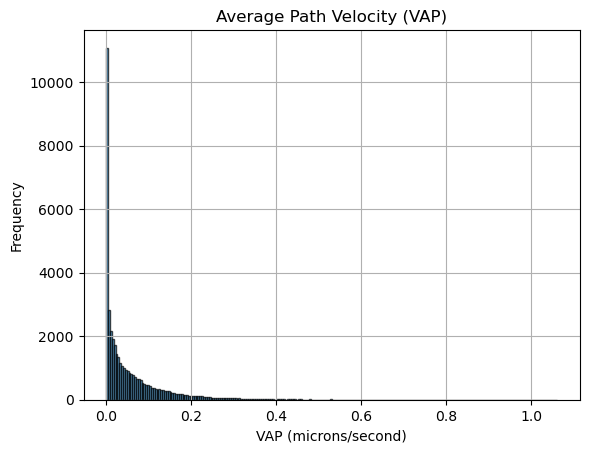

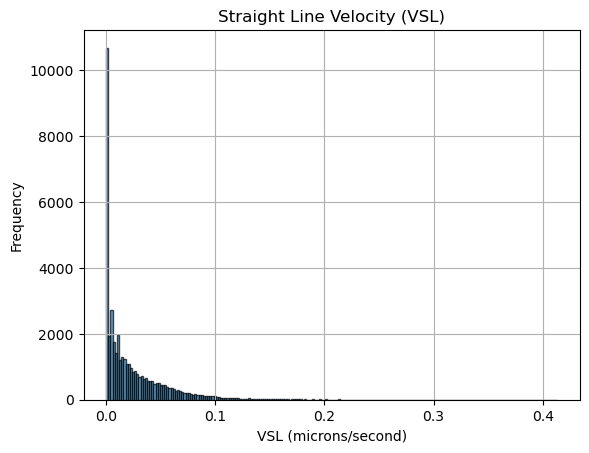

In [10]:
summarize_stats('10X_HD_1024_R1_stats.pkl')